In [2]:
# !pip install pgmpy

## 1- Construction du modèle

In [6]:
#!/usr/bin/env python
# coding: utf-8

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD


# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork(
    [
        ('DebtIncomeRatio', 'PaymentHistory'),
        ('PaymentHistory', 'Age'),
        ('PaymentHistory', 'Reliability'),
        ('Age', 'Reliability'),
        ('Income','Assets'), 
        ('Income', 'FutureIncome'),
        ('Assets', 'FutureIncome'),
        ('DebtIncomeRatio', 'BankLoan'),
        ('Reliability', 'BankLoan'),
        ('FutureIncome', 'BankLoan')
    ]
)

# Defining individual CPDs.
cpd_DebtIncomeRatio = TabularCPD(variable='DebtIncomeRatio', variable_card=2, values=[[0.5], [0.5]], state_names={'DebtIncomeRatio': ['Low', 'High']})
cpd_Income = TabularCPD(variable='Income', variable_card=3, values=[[0.333], [0.333], [0.334]], state_names={'Income': ['High', 'Medium', 'Low']})


# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | PaymentHistory |   Excellent    |    Excellent   | Excellent |   Acceptable   |   Acceptable   | Acceptable |  Unacceptable  |  Unacceptable  | Unacceptable |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Age            | Between16and25 | Between26and64 |   Over65  | Between16and25 | Between26and64 |   Over65   | Between16and25 | Between26and64 |    Over65    |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Reliability_0  |       0.7      |       0.8      |    0.9    |       0.6      |       0.7      |     0.8    |       0.5      |       0.6      |      0.7     |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+
#    | Reliability_1  |       0.3      |       0.2      |    0.1    |       0.4      |       0.3      |     0.2    |       0.5      |       0.4      |      0.3     |
#    +----------------+----------------+----------------+-----------+----------------+----------------+------------+----------------+----------------+--------------+


cpd_Reliability = TabularCPD(variable='Reliability', variable_card=2,
                      values=[[0.7, 0.8, 0.9, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7],
                              [0.3, 0.2, 0.1, 0.4, 0.3, 0.2, 0.5, 0.4, 0.3],],
                      evidence=['PaymentHistory','Age'],
                      evidence_card=[3,3],
                      state_names={'Reliability': ['Reliable', 'Unreliable'],
                                   'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable'],
                                   'Age': ['Between16and25', 'Between26and64', 'Over65']})

cpd_Age = TabularCPD(variable='Age', variable_card=3, 
                      values=[[0.1, 0.333, 0.6],
                              [0.3, 0.333, 0.3],
                              [0.6, 0.334, 0.1]],
                      evidence=['PaymentHistory'],
                      evidence_card=[3],
                      state_names={'Age': ['Between16and25', 'Between26and64', 'Over65'],
                                   'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable']})


cpd_PaymentHistory = TabularCPD(variable='PaymentHistory', variable_card=3, 
                      values=[[0.6, 0.1],
                              [0.3, 0.3],
                              [0.1, 0.6]],
                      evidence=['DebtIncomeRatio'],
                      evidence_card=[2],
                      state_names={'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable'],
                                   'DebtIncomeRatio': ['Low', 'High']})

cpd_BankLoan = TabularCPD(variable='BankLoan', variable_card=2, 
                      values=[[0.8, 0.6, 0.6, 0.4, 0.6, 0.4, 0.4, 0.2],
                              [0.2, 0.4, 0.4, 0.6, 0.4, 0.6, 0.6, 0.8]],
                      evidence=['DebtIncomeRatio','Reliability','FutureIncome'],
                      evidence_card=[2,2,2],
                      state_names={'BankLoan': ['Positive', 'Negative'],
                                   'DebtIncomeRatio': ['Low', 'High'],
                                   'Reliability': ['Reliable', 'Unreliable'],
                                   'FutureIncome': ['Promising', 'Not_promising']})


   
cpd_FutureIncome = TabularCPD(variable='FutureIncome', variable_card=2, 
                      values=[[0.9, 0.8, 0.7, 0.8,  0.75, 0.6, 0.7, 0.6, 0.5],
                              [0.1, 0.2, 0.3, 0.2,  0.25, 0.4, 0.3, 0.4, 0.5 ]],
                      evidence=['Assets', 'Income'],
                      evidence_card=[3, 3],
                      state_names={ 'FutureIncome': ['Promising', 'Not_promising'],
                                    'Assets': ['High', 'Medium', 'Low'],
                                    'Income': ['High', 'Medium', 'Low']})


cpd_Assets = TabularCPD(variable='Assets', variable_card=3, 
                      values=[[0.8, 0.7, 0.5],
                              [0.15, 0.2, 0.15],
                              [0.05, 0.1, 0.35]],
                      evidence=['Income'],
                      evidence_card=[3],
                      state_names={'Assets': ['High', 'Medium', 'Low'],
                                   'Income': ['High', 'Medium', 'Low']})


# {'DebtIncomeRatio': ['Low', 'High']})
# {'Income': ['High', 'Medium', 'Low']})
# {'PaymentHistory': ['Excellent', 'Acceptable', 'Unacceptable']}
# {'Age': ['Between16and25', 'Between26and64', 'Over65']}
# {'Reliability': ['Reliable', 'Unreliable']}
# {'Assets': ['High', 'Medium', 'Low']}
# {'FutureIncome': ['Promising', 'Not_promising']}
# {'BankLoan': ['Positive', 'Negative']}

# To complete
# cpd_Assets =

# cpd_FutureIncome =

model.add_cpds(cpd_DebtIncomeRatio, cpd_Income, cpd_PaymentHistory, cpd_Age, cpd_Reliability, cpd_Assets, cpd_FutureIncome, cpd_BankLoan)
model.check_model()


True

## Graphe

In [57]:
# !pip install graphviz

In [63]:
from graphviz import Digraph

# Initialize directed graph
dot = Digraph()

# Add nodes
nodes = ['DebtIncomeRatio', 'PaymentHistory', 'Age', 'Reliability', 'Income', 'Assets', 'FutureIncome', 'BankLoan']
for node in nodes:
    dot.node(node)

# Add edges
edges = [
    ('DebtIncomeRatio', 'PaymentHistory'),
    ('PaymentHistory', 'Age'),
    ('PaymentHistory', 'Reliability'),
    ('Age', 'Reliability'),
    ('Income', 'Assets'), 
    ('Income', 'FutureIncome'),
    ('Assets', 'FutureIncome'),
    ('DebtIncomeRatio', 'BankLoan'),
    ('Reliability', 'BankLoan'),
    ('FutureIncome', 'BankLoan')
]

for edge in edges:
    dot.edge(*edge)

# Render the graph to a file (e.g., 'financial_metrics_graph.pdf')
dot.render('financial_metrics_graph', format='png', cleanup=True)

# To display the graph inline in Jupyter, you can use
# dot



'financial_metrics_graph.png'

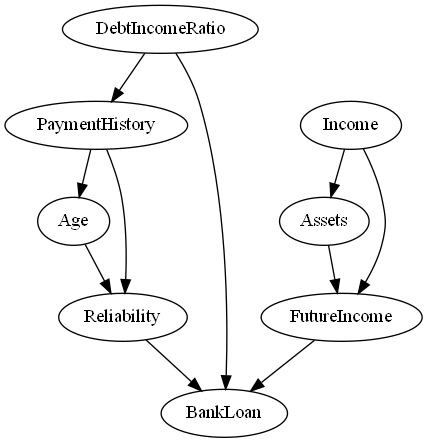

In [64]:
from IPython.display import Image
Image('financial_metrics_graph.png')

## 2- Indépendance entre les variables

### Indépendances locales

In [9]:
model.local_independencies(['Income', 'DebtIncomeRatio', 'PaymentHistory', 'Age', 'Reliability', 'Assets', 'FutureIncome', 'BankLoan' ])

(Income ⟂ DebtIncomeRatio, Reliability, Age, PaymentHistory)
(DebtIncomeRatio ⟂ Income, FutureIncome, Assets)
(PaymentHistory ⟂ Income, FutureIncome, Assets | DebtIncomeRatio)
(Age ⟂ Income, DebtIncomeRatio, FutureIncome, Assets | PaymentHistory)
(Reliability ⟂ Income, DebtIncomeRatio, FutureIncome, Assets | Age, PaymentHistory)
(Assets ⟂ DebtIncomeRatio, Reliability, Age, PaymentHistory | Income)
(FutureIncome ⟂ DebtIncomeRatio, Reliability, Age, PaymentHistory | Income, Assets)
(BankLoan ⟂ Income, Age, PaymentHistory, Assets | DebtIncomeRatio, Reliability, FutureIncome)

### Les variables aléatoires qui sont indépendantes de

In [13]:
#Income
model.local_independencies('Income')

(Income ⟂ DebtIncomeRatio, Reliability, Age, PaymentHistory)

In [14]:
#Income étant donné BankLoan.
model.active_trail_nodes('Income', observed='BankLoan')

{'Income': {'Age',
  'Assets',
  'DebtIncomeRatio',
  'FutureIncome',
  'Income',
  'PaymentHistory',
  'Reliability'}}

# Apprentissage par maximum de vraisemblance

In [16]:
import pandas as pd

data = pd.read_csv("50000-cases.csv")

In [26]:
model = BayesianNetwork(
    [
        ('DebtIncomeRatio', 'PaymentHistory'),
        ('PaymentHistory', 'Age'),
        ('PaymentHistory', 'Reliability'),
        ('Age', 'Reliability'),
        ('Income','Assets'), 
        ('Income', 'FutureIncome'),
        ('Assets', 'FutureIncome'),
        ('DebtIncomeRatio', 'BankLoan'),
        ('Reliability', 'BankLoan'),
        ('FutureIncome', 'BankLoan')
    ]
)

In [27]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [28]:
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [29]:
for cpd in model.get_cpds():
    print(cpd)

+-----------------------+---------+
| DebtIncomeRatio(High) | 0.50138 |
+-----------------------+---------+
| DebtIncomeRatio(Low)  | 0.49862 |
+-----------------------+---------+
+------------------------------+-----------------------+----------------------+
| DebtIncomeRatio              | DebtIncomeRatio(High) | DebtIncomeRatio(Low) |
+------------------------------+-----------------------+----------------------+
| PaymentHistory(Acceptable)   | 0.2984163708165463    | 0.2973406602222133   |
+------------------------------+-----------------------+----------------------+
| PaymentHistory(Excellent)    | 0.0989668514898879    | 0.6018611367373952   |
+------------------------------+-----------------------+----------------------+
| PaymentHistory(Unacceptable) | 0.6026167776935658    | 0.10079820304039148  |
+------------------------------+-----------------------+----------------------+
+---------------------+-----+------------------------------+
| PaymentHistory      | ... | PaymentHi

In [38]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

In [ ]:
# P(BankLoan); 
# P(BankLoan|Income = Low,Age = Between16and25,PaymentHistory = Excellent,Assets = Low);
# P(BankLoan|Income = High,Age = Between16and25,PaymentHistory = Excellent,Assets = High); 
# P(BankLoan|Income = High,Age = Over65,PaymentHistory = Excellent,Assets = High).

In [40]:
# P(BankLoan)
phi_query = inference.query(['BankLoan'])
print(phi_query)

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.4574 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.5426 |
+--------------------+-----------------+


In [44]:
# P(BankLoan|Income = Low,Age = Between16and25,PaymentHistory = Excellent,Assets = Low);

phi_query = inference.query(['BankLoan'], evidence={'Income': 'Low', 'Age':'Between16and25', 'PaymentHistory': 'Excellent', 'Assets': 'Low'})
print(phi_query)

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.4674 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.5326 |
+--------------------+-----------------+


In [45]:
# P(BankLoan|Income = High,Age = Between16and25,PaymentHistory = Excellent,Assets = High); 
phi_query = inference.query(['BankLoan'], evidence={'Income': 'High', 'Age':'Between16and25', 'PaymentHistory': 'Excellent', 'Assets': 'High'})
print(phi_query)

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.3065 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.6935 |
+--------------------+-----------------+


In [47]:
# P(BankLoan|Income = High,Age = Over65,PaymentHistory = Excellent,Assets = High).
phi_query = inference.query(['BankLoan'], evidence={'Income': 'High', 'Age':'Over65', 'PaymentHistory': 'Excellent', 'Assets': 'High'})
print(phi_query)

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.2662 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.7338 |
+--------------------+-----------------+


## 5-Inférence par échantillonnage en avant

In [50]:
from pgmpy.inference import ApproxInference

approx_infer = ApproxInference(model)

#P(BankLoan)
phi_query = approx_infer.query(variables=["BankLoan"], n_samples=1000)
print(phi_query)

  0%|          | 0/8 [00:00<?, ?it/s]

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Positive) |          0.5430 |
+--------------------+-----------------+
| BankLoan(Negative) |          0.4570 |
+--------------------+-----------------+


In [51]:
# P(BankLoan|Income = Low,Age = Between16and25,PaymentHistory = Excellent,Assets = Low);

phi_query = approx_infer.query(['BankLoan'], evidence={'Income': 'Low', 'Age':'Between16and25', 'PaymentHistory': 'Excellent', 'Assets': 'Low'})
print(phi_query)

  0%|          | 0/10000 [00:00<?, ?it/s]

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.4696 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.5304 |
+--------------------+-----------------+


In [52]:
# P(BankLoan|Income = High,Age = Between16and25,PaymentHistory = Excellent,Assets = High); 
phi_query = approx_infer.query(['BankLoan'], evidence={'Income': 'High', 'Age':'Between16and25', 'PaymentHistory': 'Excellent', 'Assets': 'High'})
print(phi_query)

  0%|          | 0/10000 [00:00<?, ?it/s]

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Negative) |          0.3058 |
+--------------------+-----------------+
| BankLoan(Positive) |          0.6942 |
+--------------------+-----------------+


In [53]:
# P(BankLoan|Income = High,Age = Over65,PaymentHistory = Excellent,Assets = High).
phi_query = approx_infer.query(['BankLoan'], evidence={'Income': 'High', 'Age':'Over65', 'PaymentHistory': 'Excellent', 'Assets': 'High'})
print(phi_query)

  0%|          | 0/10000 [00:00<?, ?it/s]

+--------------------+-----------------+
| BankLoan           |   phi(BankLoan) |
+====================+=================+
| BankLoan(Positive) |          0.7373 |
+--------------------+-----------------+
| BankLoan(Negative) |          0.2627 |
+--------------------+-----------------+
